## Business Problem:
**Hotel operators want to improve their business efficiency by leveraging their historical data and they want to know what happened to their previous bookings, get to know their customers better and optimize promo times.**

## Task 1 : Import Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

## Task 2 : Read Dataset

In [2]:
df= pd.read_csv('Ritz_Jager_Data.csv')
df.head(5)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## Task 3 : Find Information from Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [6]:
df.shape

(119390, 32)

## Drop Missing Value

In [7]:
df = df.drop('company', axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [9]:
df.shape

(119390, 31)

In [10]:
df.head(10)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,22/4/2015


## Answering Questions

## 1) Where do the guests come from (country of origin)?

In [72]:
#Hotel Guest's Country of Origin
df['country_origin'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country_origin, Length: 177, dtype: int64

Text(0, 0.5, 'Total Reservation')

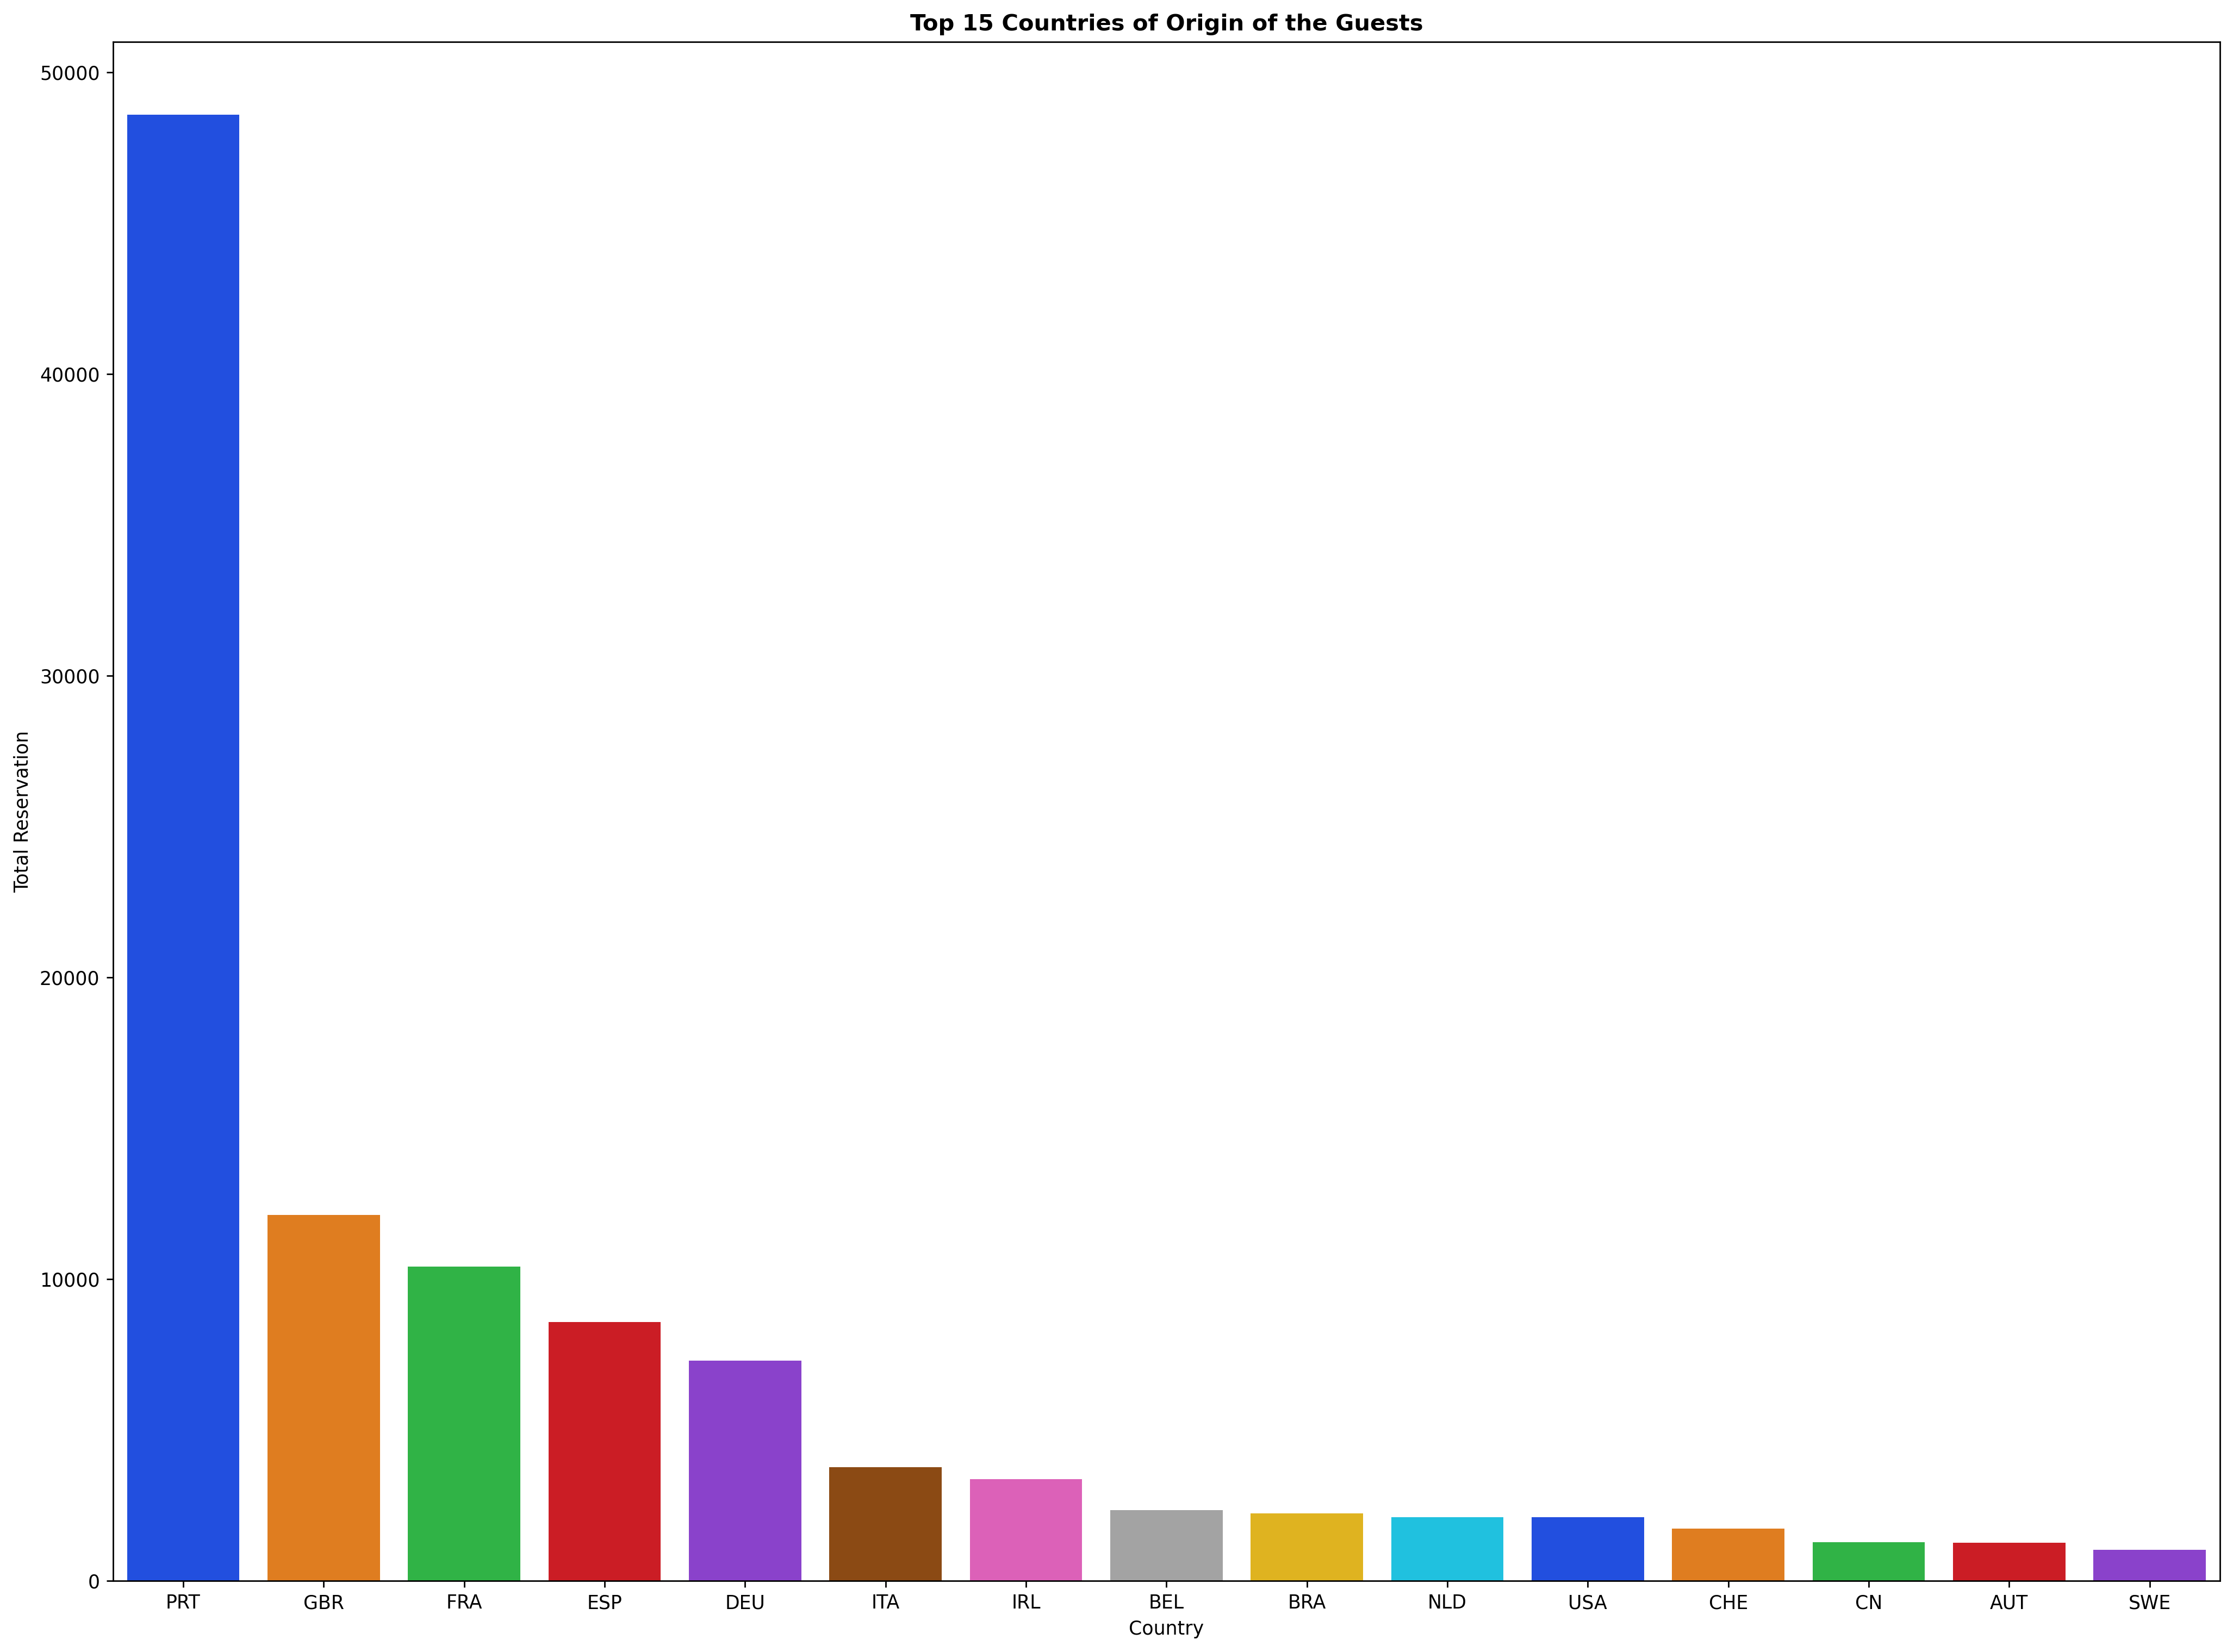

In [74]:
#Visualization
plt.figure(figsize=(20,15), dpi=250)

sns.countplot(data=df, x='country_origin',order=pd.value_counts(df['country_origin']).iloc[:15].index,
              palette='bright')

plt.title('Top 15 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Total Reservation')

Hotel guests come from **177 countries**, but will be taken with 15 countries with the highest number of customers from Hotels. And **PRT** **(PORTUGAL)** became the customer country with the highest number of **48590**.

## 2) Which month is the busiest month (the highest number of bookings)?

In [13]:
#Hotel Busiest Month
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

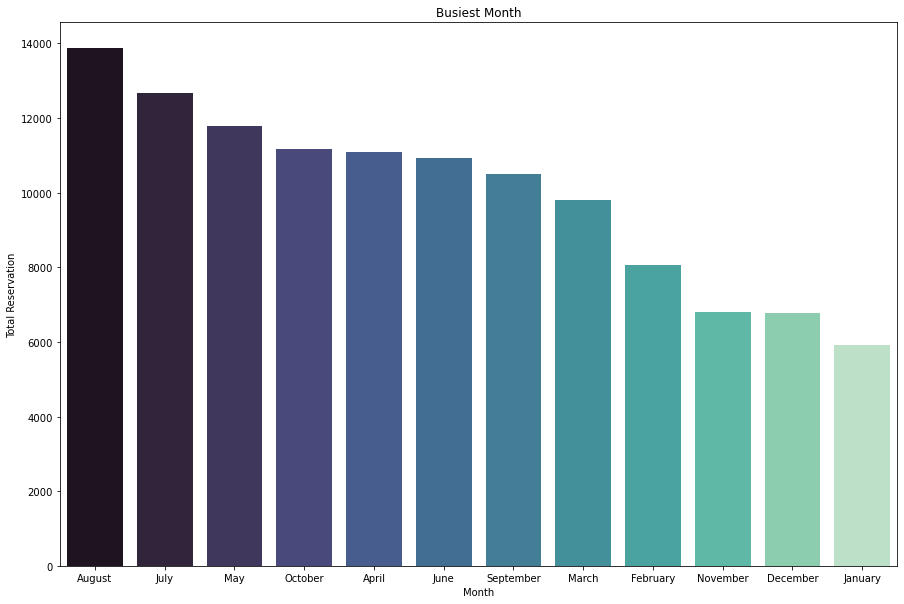

In [42]:
#Visualization
plt.figure(figsize=(15,10))
sns.countplot(data=df ,x='arrival_date_month', palette='mako',
              order=pd.value_counts(df['arrival_date_month']).index)

plt.title('Busiest Month')
plt.xlabel('Month')
plt.ylabel('Total Reservation')
plt.show()

From the analysis that has been done, the busiest month for hotels occurs in **August**. This month, the hotel received **13,877 reservations**. Meanwhile, **January is the month with the lowest total hotel bookings, which is 5,929 hotel reservations**.

## 3) How long (nights) do people stay at the hotel (on average)?

In [68]:
#Average number of guests staying per night
df_stays = df[['stays_in_weekend_nights','stays_in_week_nights']].mean()
df_stays = pd.DataFrame(df_stays).reset_index()
df_stays = df_stays.rename(columns ={'index':'Type of week stay at the hotel', 0:'mean'})
df_stays

,Type of week stay at the hotel,mean
0,stays_in_weekend_nights,0.927599
1,stays_in_week_nights,2.500302


Text(0.5, 1.0, 'Average Guest Stay at Hotel')

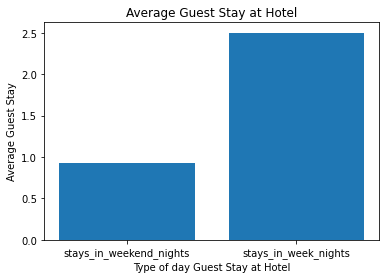

In [92]:
#Visualization
plt.bar(df_stays['Type of week stay at the hotel'], df_stays['mean'])
plt.xlabel('Type of day Guest Stay at Hotel')
plt.ylabel('Average Guest Stay')
plt.title('Average Guest Stay at Hotel')

From the analysis, **the total average hotel guest stays on weekends is 1 night, and on weekdays it is 2.5 nights, so the total average guest stays is 3,427 days.**

In [91]:
#Total Average Guest Staying at the Hotel
df['stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['stays'].mean()

3.4279001591423066

## 4) Number of orders by market segments?

In [4]:
#Number of Hotel Reservations Based on Market Segment
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

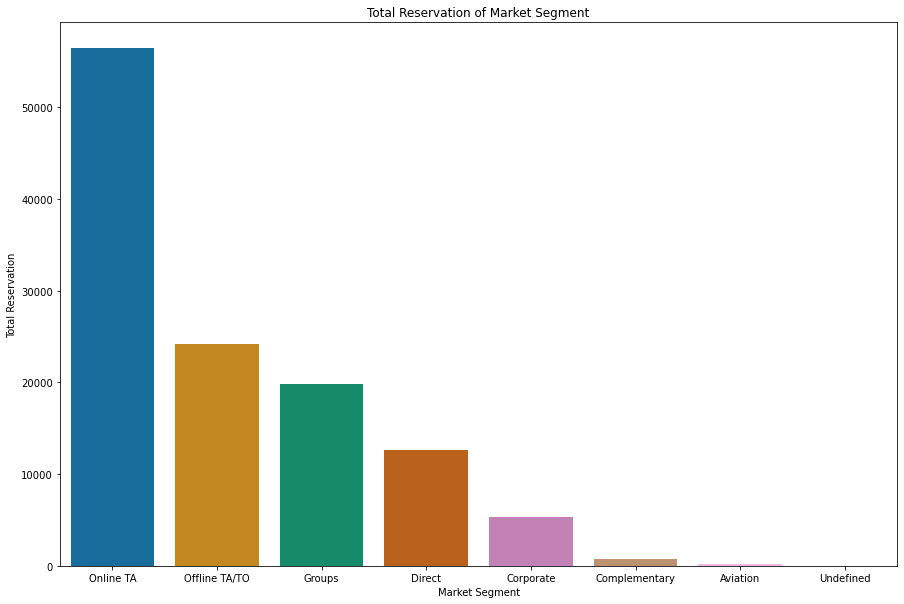

In [44]:
#Visualization
plt.figure(figsize=(15,10))
sns.countplot(data=df ,x='market_segment', palette='colorblind',
              order=pd.value_counts(df['market_segment']).index)

plt.title('Total Reservation of Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Reservation')
plt.show()

Hotel guests book hotels in different ways. **There are 8 different ways for guests to book hotels**, the way guests or the most frequently used market segment to book hotels, namely through **Online Travel Agents (TA), which is 56477 booking transactions.**

## 5) How many bookings were canceled per hotel room type?

In [84]:
#Number of Canceled Bookings Based on Hotel Room Type
df.groupby('is_canceled')['assigned_room_type'].value_counts(normalize = False)

is_canceled  assigned_room_type
0            A                     41105
             D                     18960
             E                      5838
             F                      2824
             C                      1929
             G                      1773
             B                      1651
             H                       461
             I                       358
             K                       267
1            A                     32948
             D                      6362
             E                      1968
             F                       927
             G                       780
             B                       512
             C                       446
             H                       251
             K                        12
             P                        12
             I                         5
             L                         1
Name: assigned_room_type, dtype: int64

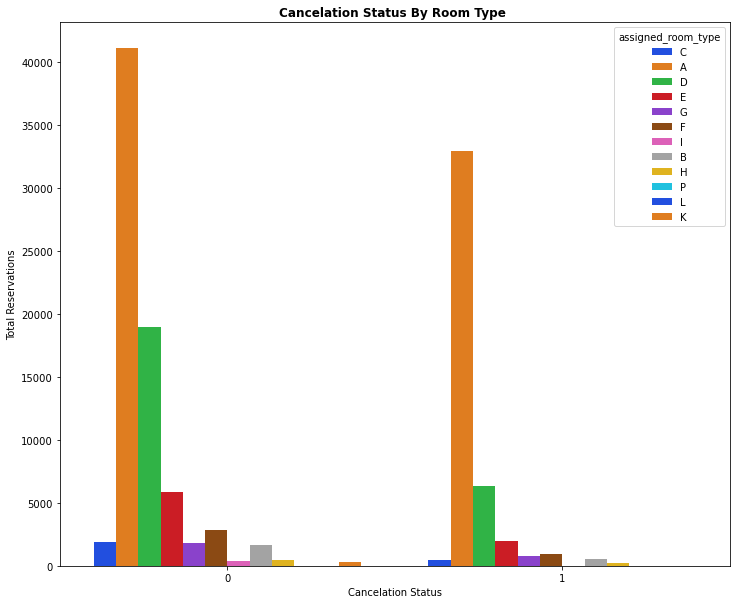

In [89]:
#Visualization
plt.figure(figsize = (12,10))
sns.countplot(x='is_canceled', data = df, hue = 'assigned_room_type', palette= 'bright')

plt.title("Cancelation Status By Room Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel("Total Reservations")
plt.show()

Note:

0 = Not Canceled

1 = Canceled

From the graph, it can be seen that **hotel room type A is the type of room that is most canceled by guests, which is 32948.**

## Which month had the highest number of cancellations?

In [82]:
#Month with the Most Total Hotel Cancellations 
df.groupby('is_canceled')['arrival_date_month'].value_counts(normalize = False)

is_canceled  arrival_date_month
0            August                8638
             July                  7919
             May                   7114
             October               6914
             March                 6645
             April                 6565
             June                  6404
             September             6392
             February              5372
             November              4672
             December              4409
             January               4122
1            August                5239
             July                  4742
             May                   4677
             June                  4535
             April                 4524
             October               4246
             September             4116
             March                 3149
             February              2696
             December              2371
             November              2122
             January               1807
Name: ar

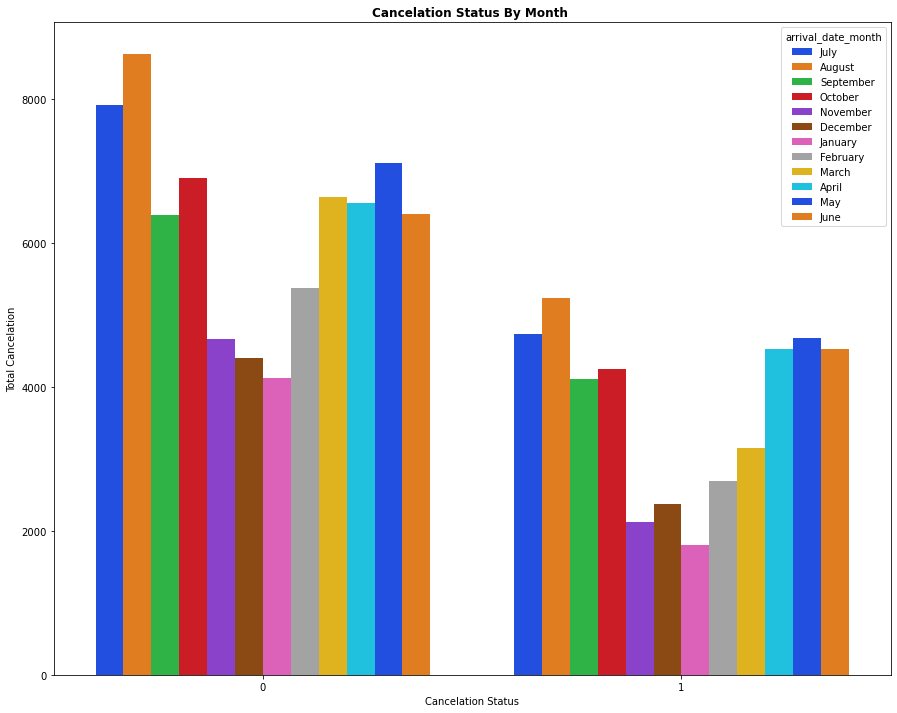

In [88]:
#Visualization
plt.figure(figsize = (15,12))
sns.countplot(x='is_canceled', data = df, hue = 'arrival_date_month', palette= 'bright')

plt.title("Cancelation Status By Month ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel("Total Cancelation")
plt.show()

Note: 

0 = Not Canceled

1 = Canceled

In addition to being the busiest month, it turns out **that the month that has the highest number of cancellations also occurs in August, with a total cancellation of 5239 out of a total of 13,877 orders.**